# Regresión lógística binomial

[Curso de Regresión Logística con Python y scikit-learn](https://platiz.com/reglog)

## Carga de datos

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Cambiar total_charges a numeric

In [4]:
df_data.info() # Se puede observar que el label de total_charges no está en tipo numerico 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='coerce') # Cambio de la variables a tipo numerico

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Manejo de datos nulos

In [7]:
df_data.isnull().sum() # Se observa que probablemente los valores nulos fueron los que cambiaron el tipo de dato en la variables TotalCharges

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df_data.dropna(inplace=True) # Eliminación de los valores nulos

In [9]:
df_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Eliminar id

In [10]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df_data.drop('customerID',axis=1,inplace=True) # Eliminación de la columna Customerid por el eje 1, el de las columnas 

In [12]:
df_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Convertir a numérico variable objetivo

In [13]:
df_data['Churn'].replace(to_replace ='Yes',value = 1,inplace=True) # Conversion variable objetivo categorica en numerica 
df_data['Churn'].replace(to_replace ='No',value = 0,inplace=True)

In [14]:
df_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [15]:
df_data_processing = df_data.copy(deep=True)
df_data_processing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

## Manejo de variables categóricas

In [16]:
df_data_processing = pd.get_dummies(df_data_processing,dtype=int) # Codificacion variables categoricas
df_data_processing


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


## Analisis de correlación

In [17]:
import matplotlib.pyplot as plt

<Axes: >

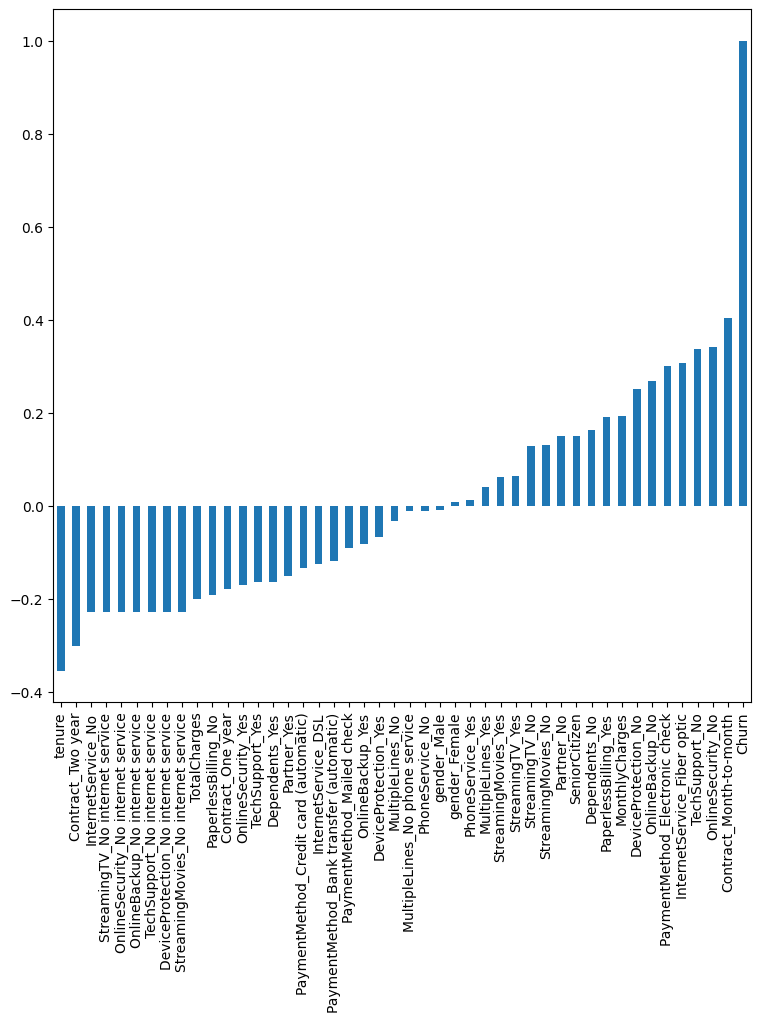

In [18]:
plt.figure(figsize=(9,9))
df_data_processing.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')

## Escalabilidad de los datos

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_data_processing_scaled = scaler.fit_transform(df_data_processing)
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)
df_data_processing_scaled.columns = df_data_processing.columns
df_data_processing_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Análisis exploratorio de datos

In [20]:
import seaborn as sns

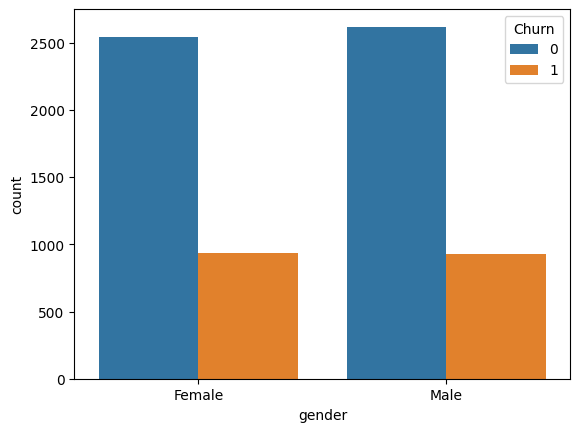

In [21]:
sns.countplot(data=df_data,
              x = 'gender',
              hue='Churn'
              )
plt.show()

In [22]:
def plot_categorical(column):
    fig = plt.figure(figsize=(5,5))
    sns.countplot(data=df_data,
              x = column,
              hue='Churn'
              )
plt.show()

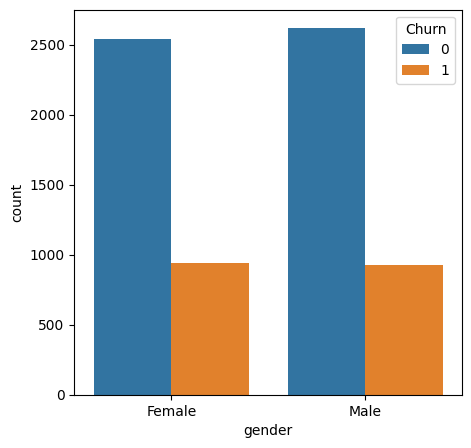

In [23]:
plot_categorical('gender')

In [24]:
categorical_columns = df_data.select_dtypes(include='object').columns
categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

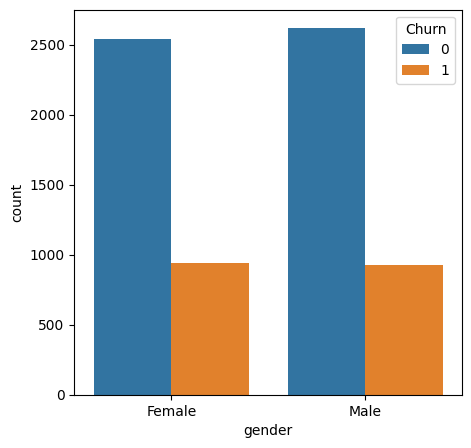

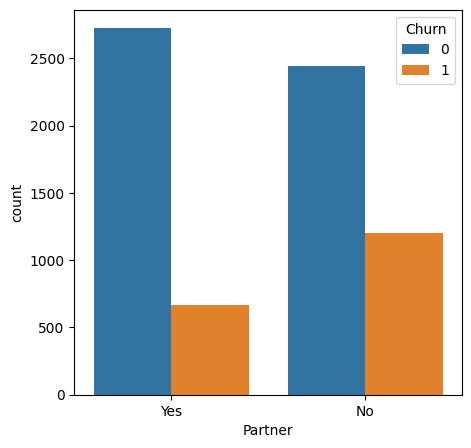

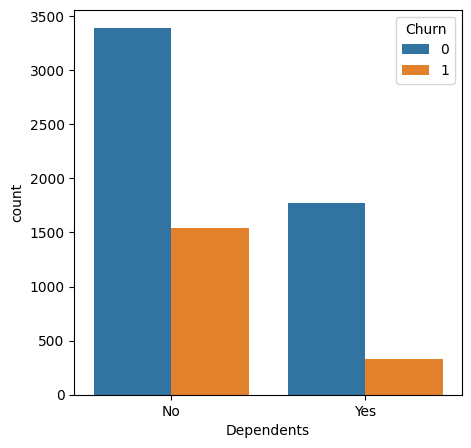

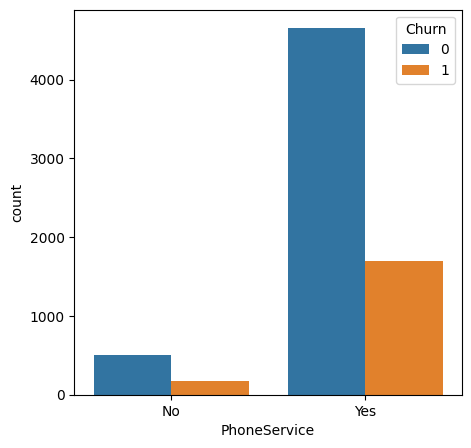

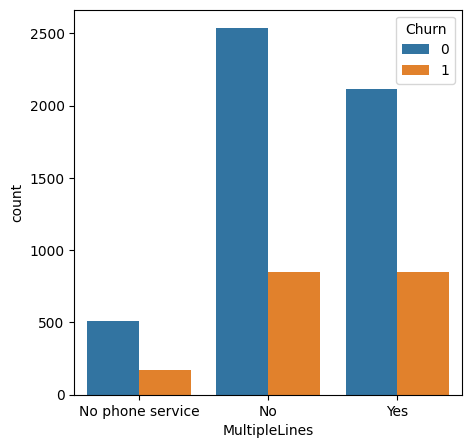

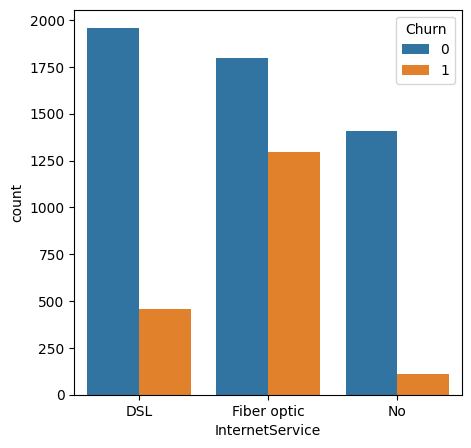

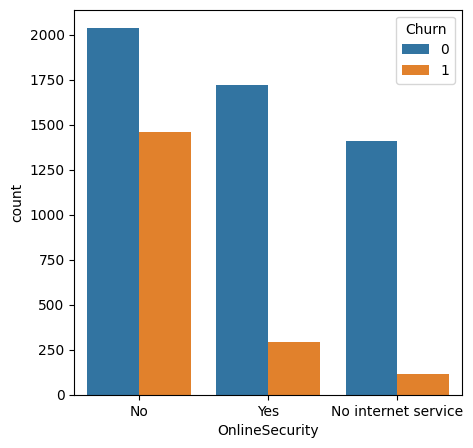

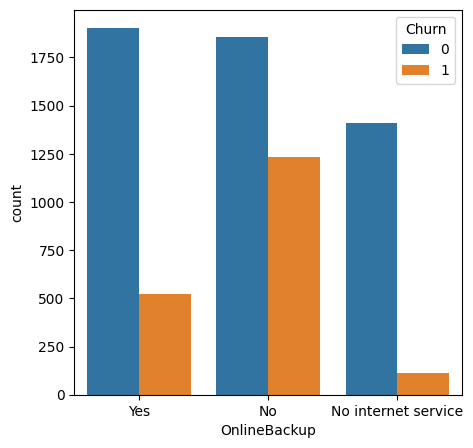

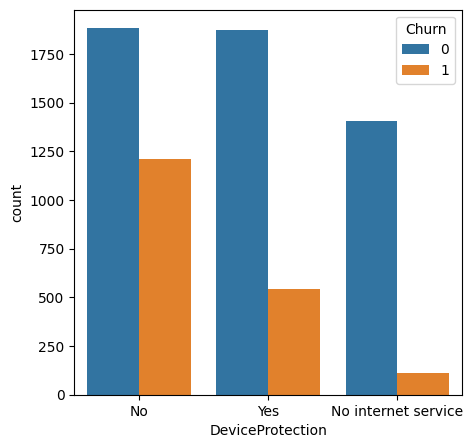

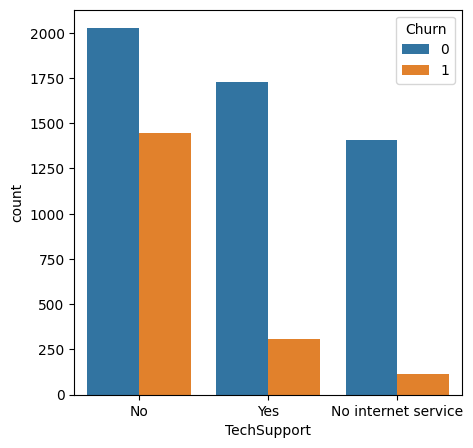

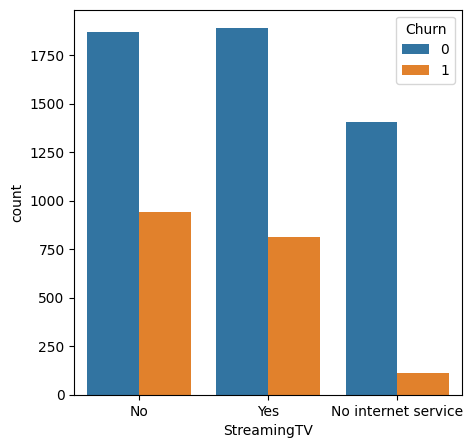

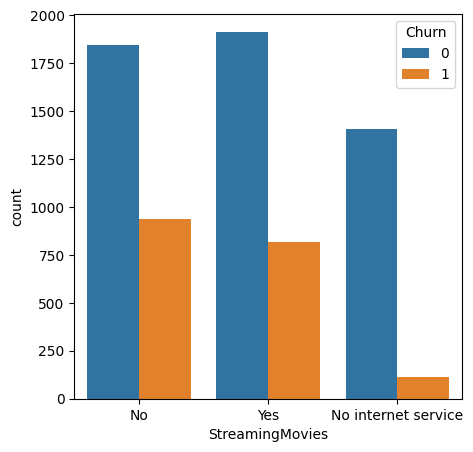

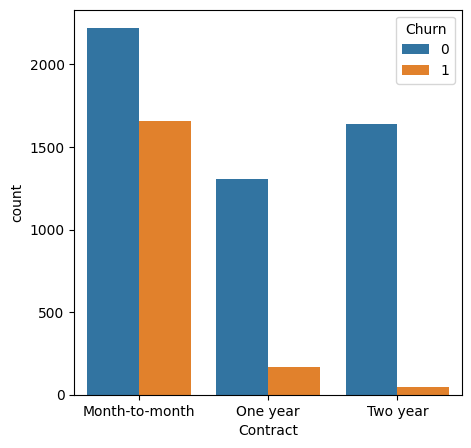

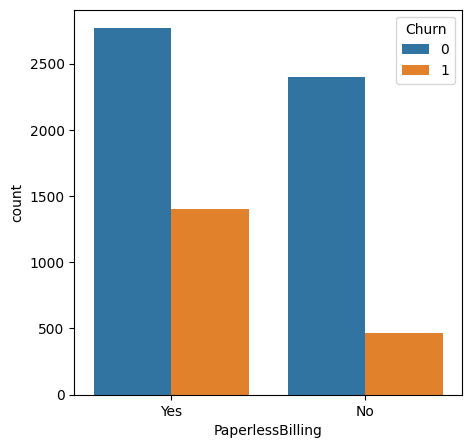

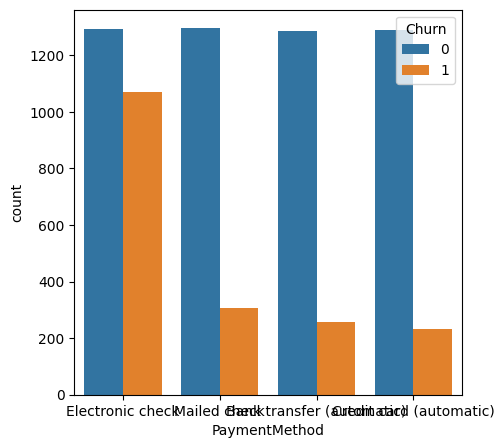

In [25]:
for _ in categorical_columns: # Generación de graficos categoricos de forma iterativa
    plot_categorical(_)

Realizando con subplots

In [26]:
def plot_categorical_subplot(columns,ncols=2):
    #Numero de graficas a realizar 
    nplot = len(columns)
    nrows = (nplot // ncols) + 1
    fig, axes = plt.subplots(nrows,ncols,figsize=(15,30),constrained_layout=True)  #constrained_layout es para ajustar todos los elementos secundarios al grafico
    for row in range(nrows):
        for col in range(ncols):
            title = columns[row+col]
            sns.countplot(data=df_data, x=title,hue='Churn',ax=axes[row,col])
            axes[row,col].set_title('Count '+title.upper())
            axes[row,col].set_xlabel(title)
            axes[row,col].set_ylabel('Count')
            axes[row,col].legend()
    fig.tight_layout()
    plt.show()
        

        

/tmp/ipykernel_297/297360907.py:14: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


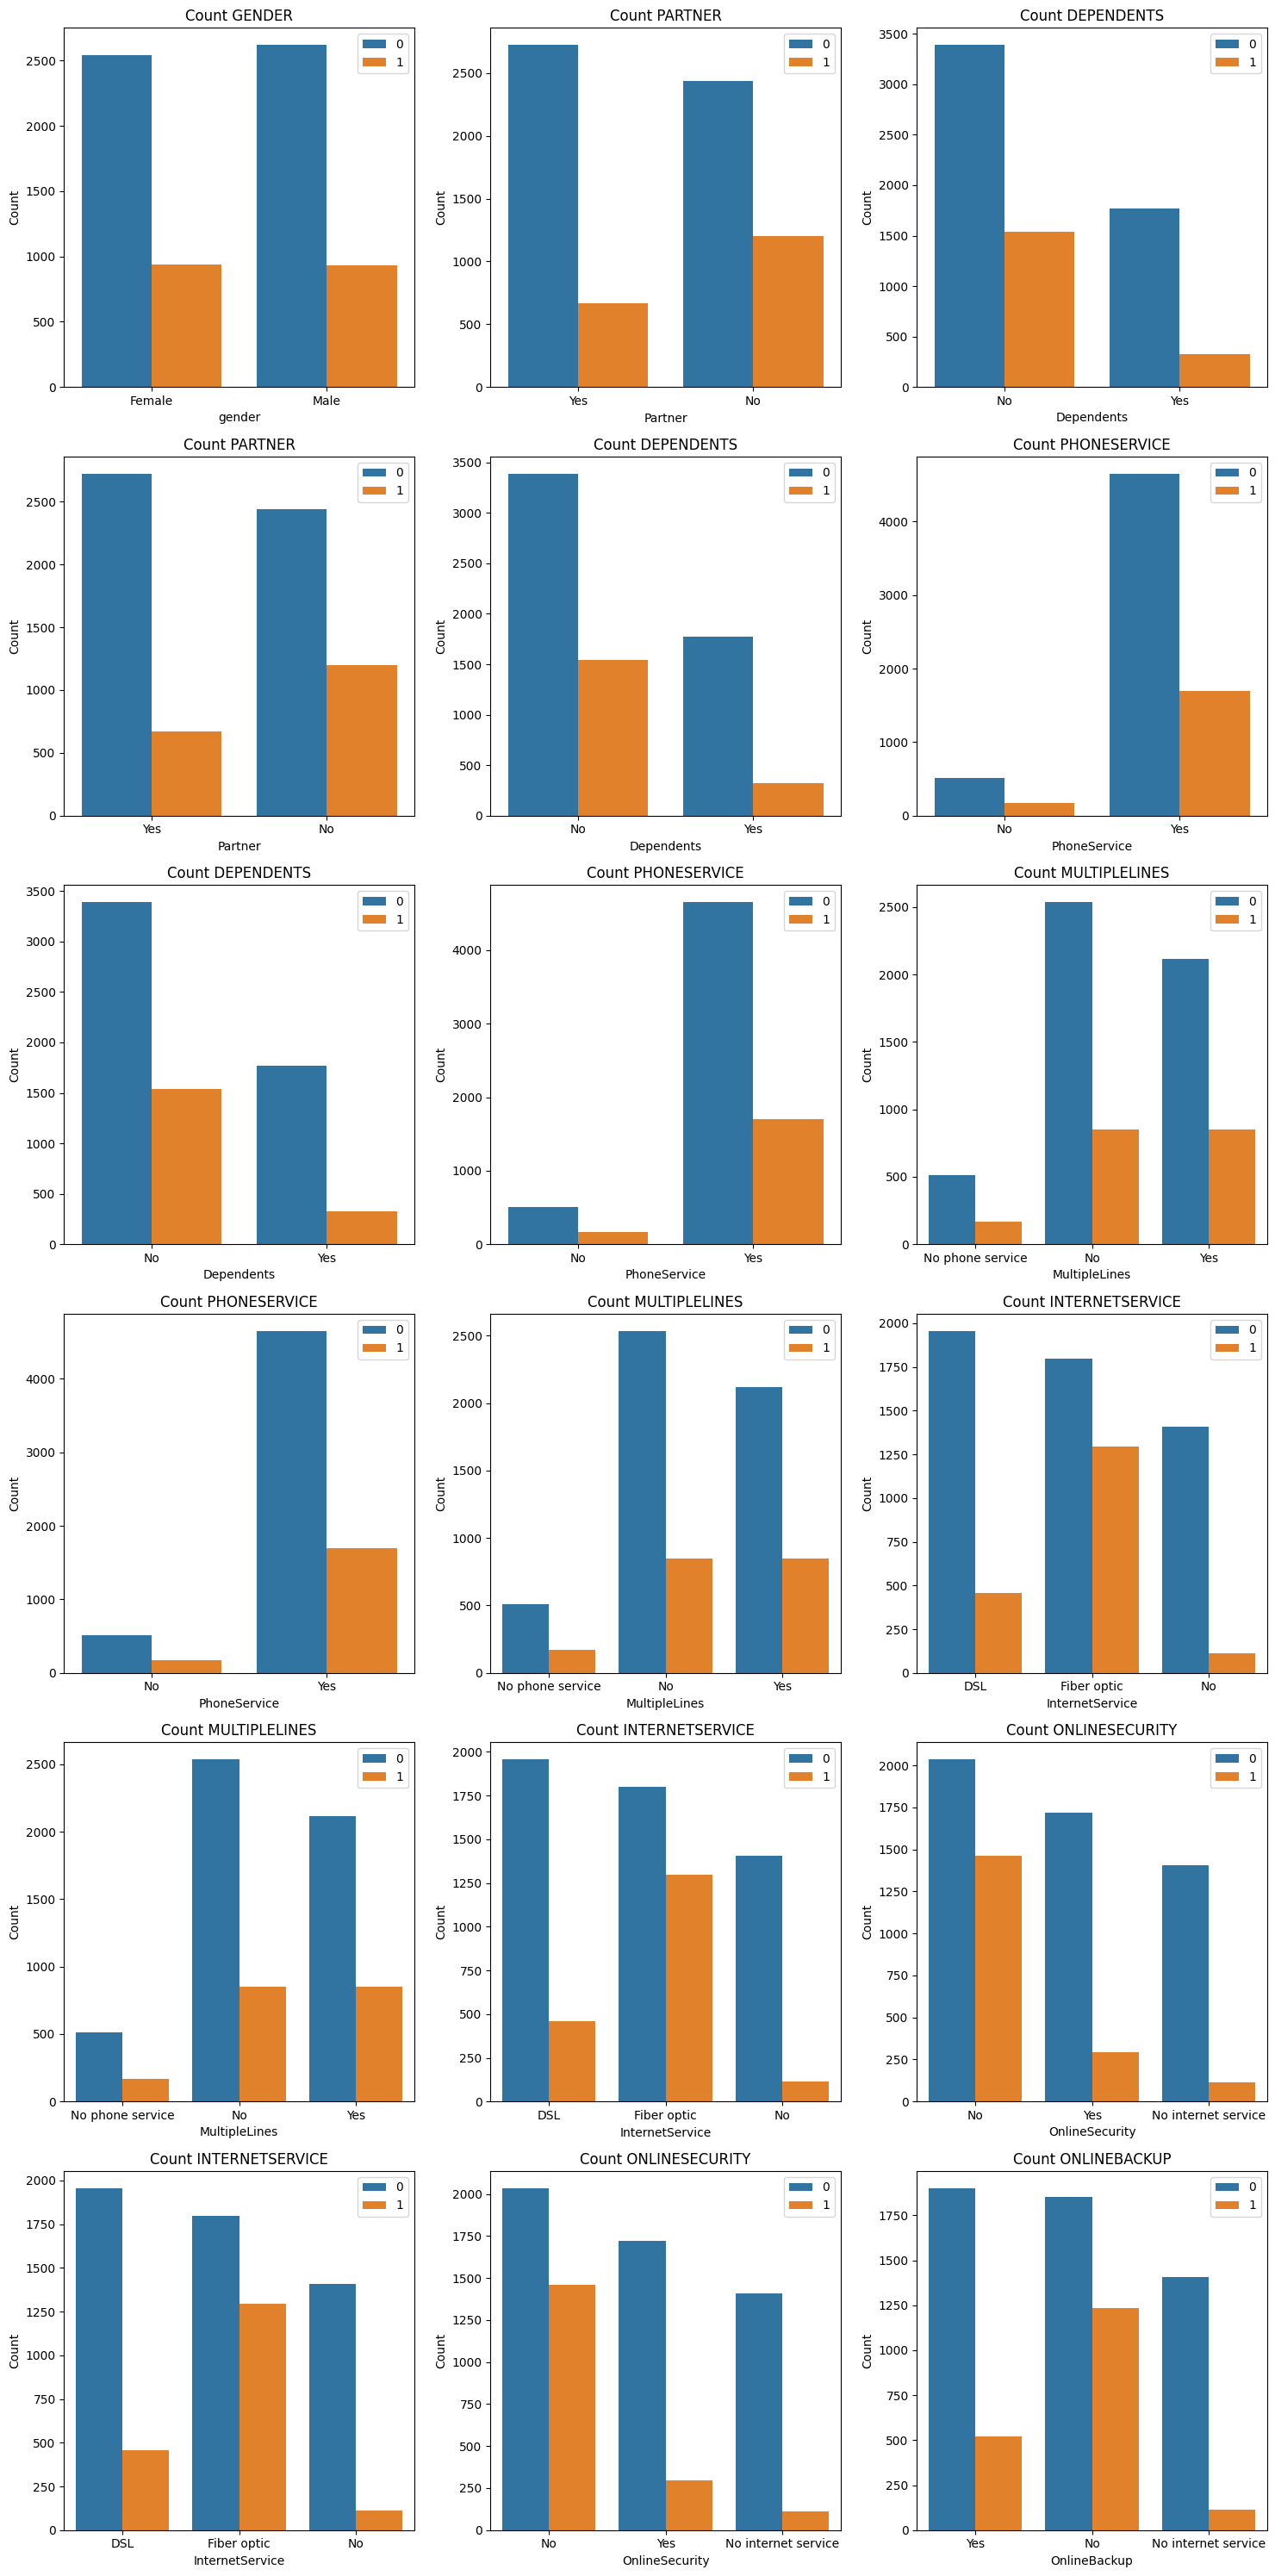

In [27]:
plot_categorical_subplot(columns = categorical_columns, ncols=3)

## Entrenamiento del modelo de regresión logística binomial

In [28]:
X = df_data_processing_scaled.drop('Churn', axis=1)
y = df_data_processing_scaled['Churn']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3,random_state=43)


In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train,y_train)

/home/nico9779/anaconda3/envs/regresion_logistica/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from sklearn import metrics
prediction_result = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_result)*100,'%')

79.19431279620854 %


## Evaluación del modelo

In [32]:
model.predict_proba(X_test)

array([[0.66998101, 0.33001899],
       [0.1800368 , 0.8199632 ],
       [0.9434492 , 0.0565508 ],
       ...,
       [0.37269149, 0.62730851],
       [0.26687408, 0.73312592],
       [0.35184969, 0.64815031]])

In [33]:
model.coef_

array([[ 2.38756316e-01, -3.29448002e+00, -2.17161648e-01,
         1.28354325e+00,  4.55464813e-02, -4.72616895e-02,
        -3.47662411e-02,  3.30510328e-02,  1.34884742e-01,
        -1.36599950e-01,  9.02591005e-02, -9.19743088e-02,
        -1.67394539e-01,  9.02591005e-02,  7.54202301e-02,
        -3.97379085e-01,  4.98336353e-01, -1.02672475e-01,
         3.00710344e-01, -1.02672475e-01, -1.99753077e-01,
         1.00371883e-01, -1.02672475e-01,  5.85383727e-04,
         3.92250712e-02, -1.02672475e-01,  6.17321960e-02,
         2.32395989e-01, -1.02672475e-01, -1.31438722e-01,
        -1.06416387e-01, -1.02672475e-01,  2.07373654e-01,
        -6.13225502e-02, -1.02672475e-01,  1.62279817e-01,
         6.73117085e-01, -1.41202956e-02, -6.60711997e-01,
        -1.30718933e-01,  1.29003725e-01, -8.06022543e-02,
        -9.62054306e-02,  2.70049919e-01, -9.49574426e-02]])

### Features que más influyen en que un cliente hagan **Churn**

In [34]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

In [35]:
weights = pd.Series(model.coef_[0],
                    index = X.columns.values)


In [36]:
weights.sort_values(ascending=False)

TotalCharges                               1.283543
Contract_Month-to-month                    0.673117
InternetService_Fiber optic                0.498336
OnlineSecurity_No                          0.300710
PaymentMethod_Electronic check             0.270050
SeniorCitizen                              0.238756
TechSupport_No                             0.232396
StreamingTV_Yes                            0.207374
StreamingMovies_Yes                        0.162280
Dependents_No                              0.134885
PaperlessBilling_Yes                       0.129004
OnlineBackup_No                            0.100372
MultipleLines_No phone service             0.090259
PhoneService_No                            0.090259
MultipleLines_Yes                          0.075420
DeviceProtection_Yes                       0.061732
gender_Female                              0.045546
DeviceProtection_No                        0.039225
Partner_Yes                                0.033051
OnlineBackup

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


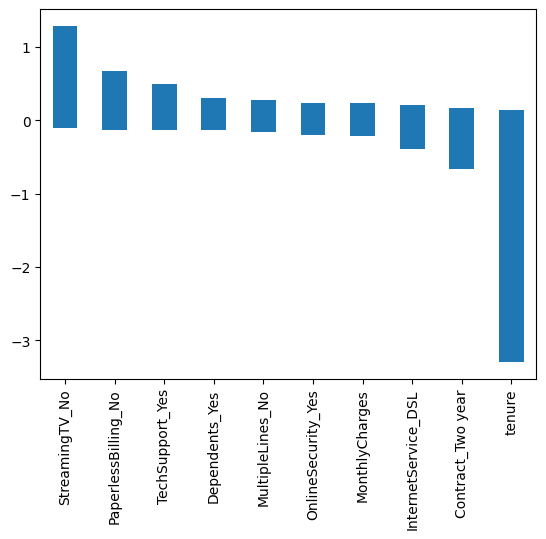

In [37]:
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

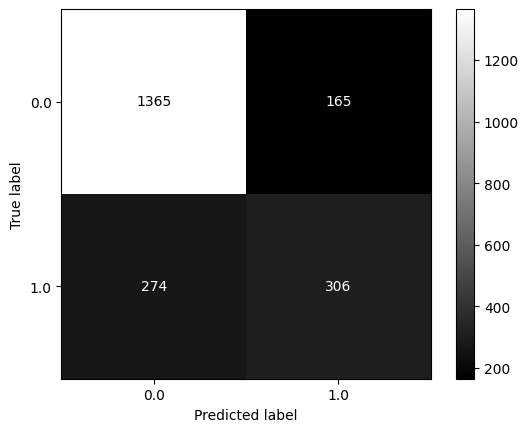

Recall Churn = No (O.0) 0.8921568627450981
Recall Churn = Si (1.0) 0.5275862068965518


In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,prediction_result,labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()
print(f'Recall Churn = No (O.0) {metrics.recall_score(y_test,prediction_result,pos_label=0)}')
print(f'Recall Churn = Si (1.0) {metrics.recall_score(y_test,prediction_result,pos_label=1)}')

In [39]:
df_data['Churn'].value_counts(normalize=True)*100

Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

Se puede observar como la precision para predecir cuando si(1.0) se realiza Churn es baja en comparación con los valores de no(0.0). 

Esto se debe a que las etiquetas no están equilibradas, el 73.42% originalmente están dados para no (0.0) y el 26.57% para si(1.0). Por ello el modelo no aprende de forma adecuada a como identificar los patrones. Para ello es necesario realizar un balanceo de clases con SMOTE (Synthetic Minority Oversampling Technique)

## SMOTE 

In [40]:
from imblearn.over_sampling import SMOTE
df_data_processing_scaled2 = df_data_processing_scaled.copy(deep=True)
oversample_r = SMOTE()
x_smote, y_smote = oversample_r.fit_resample(X,y)


In [41]:
y_smote.value_counts()

Churn
0.0    5163
1.0    5163
Name: count, dtype: int64

In [42]:
# Creación datos de entrenamiento y prueba
x_strain,x_stest,y_strain,y_stest = train_test_split(x_smote,y_smote,test_size=0.3,random_state=43)

In [43]:
# Creación del modelo
model2 = LogisticRegression()
result2 = model2.fit(x_strain,y_strain)
prediction_result2 = model.predict(x_stest)
print(metrics.accuracy_score(y_stest,prediction_result2)*100,'%')

73.692704970949 %


In [47]:

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3,random_state=43)
model = LogisticRegression()
result = model.fit(X_train,y_train)
prediction_result = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_result)*100,'%')

79.19431279620854 %


/home/nico9779/anaconda3/envs/regresion_logistica/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


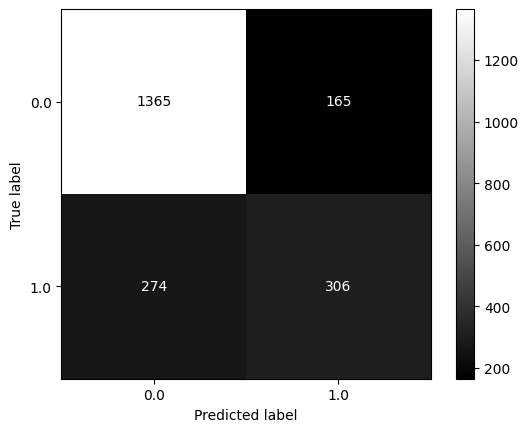

Recall Churn = No (O.0) 0.900066181336863
Recall Churn = Si (1.0) 0.5816005040957782


In [48]:
# Visualización resultados
cm2 = confusion_matrix(y_stest,prediction_result2,labels = model2.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model2.classes_)
disp.plot(cmap='gray')
plt.show()
print(f'Recall Churn = No (O.0) {metrics.recall_score(y_stest,prediction_result2,pos_label=0)}')
print(f'Recall Churn = Si (1.0) {metrics.recall_score(y_stest,prediction_result2,pos_label=1)}')

### Utilizando SMOTEEN (Synthetic Minority Oversampling Technique-Edited Nearest Neighbor)

In [49]:
from imblearn.combine import SMOTEENN
imp = SMOTEENN(sampling_strategy=0.99)
xbal,ybal = imp.fit_resample(X,y)
(ybal.value_counts()/ybal.shape[0])

Churn
1.0    0.552576
0.0    0.447424
Name: count, dtype: float64

In [50]:
X_trainsmoten,X_testsmoten,y_trainsmoten,y_testsmoten = train_test_split(xbal,ybal, test_size = 0.3,random_state=43)
model3 = LogisticRegression()
result3 = model3.fit(X_trainsmoten,y_trainsmoten)
prediction_result3 = model3.predict(X_testsmoten)
print(metrics.accuracy_score(y_testsmoten,prediction_result3)*100,'%')

91.1716621253406 %


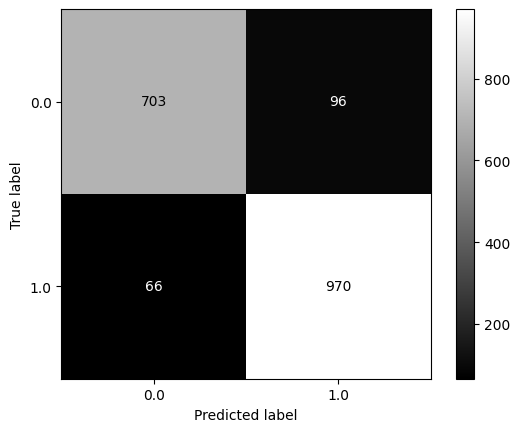

Recall Churn = No (O.0) 0.8798498122653317
Recall Churn = Si (1.0) 0.9362934362934363


In [51]:
# Visualización resultados
cm3 = confusion_matrix(y_testsmoten,prediction_result3,labels = model3.classes_)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=model3.classes_)
disp3.plot(cmap='gray')
plt.show()
print(f'Recall Churn = No (O.0) {metrics.recall_score(y_testsmoten,prediction_result3,pos_label=0)}')
print(f'Recall Churn = Si (1.0) {metrics.recall_score(y_testsmoten,prediction_result3,pos_label=1)}')

# Regularización 

Es una técnica que consiste en reducir la complejidad del modelo a través de una penalización a las variables que sean más irrelevantes. 

## Tipos de regularización 

### L1 Lasso
Reduce la complejidad a través de la eliminación de features que aportan poco al modelo. Penaliza a los features que aportan poco, volviendolos cero, eliminando el ruido que producen en el modelo. 




**c** es un parámetro que define que tanto se penaliza a los features que menos aportan, debe ser siempre un valor positivo, a menor sea el valor de c, mayor será la penalización.

In [55]:
lasso = LogisticRegression(max_iter=10000,penalty='l1',solver='saga',C=0.5)
lasso.fit(X_train,y_train)
lasso.score(X_test,y_test)

0.7933649289099526

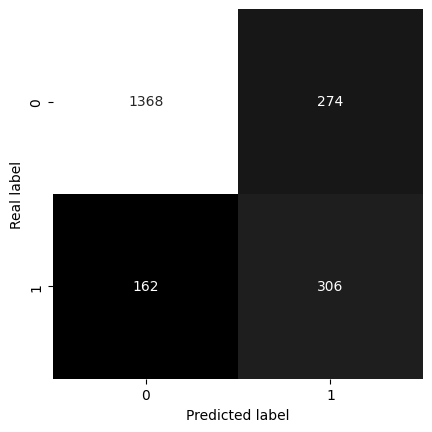

In [59]:
cm = confusion_matrix(lasso.predict(X_test),y_test)
sns.heatmap(
    cm,
    annot= True,
    cmap= 'gray',
    cbar= False,
    square=True,
    fmt='d'
)
plt.xlabel('Predicted label')
plt.ylabel('Real label')
plt.show()

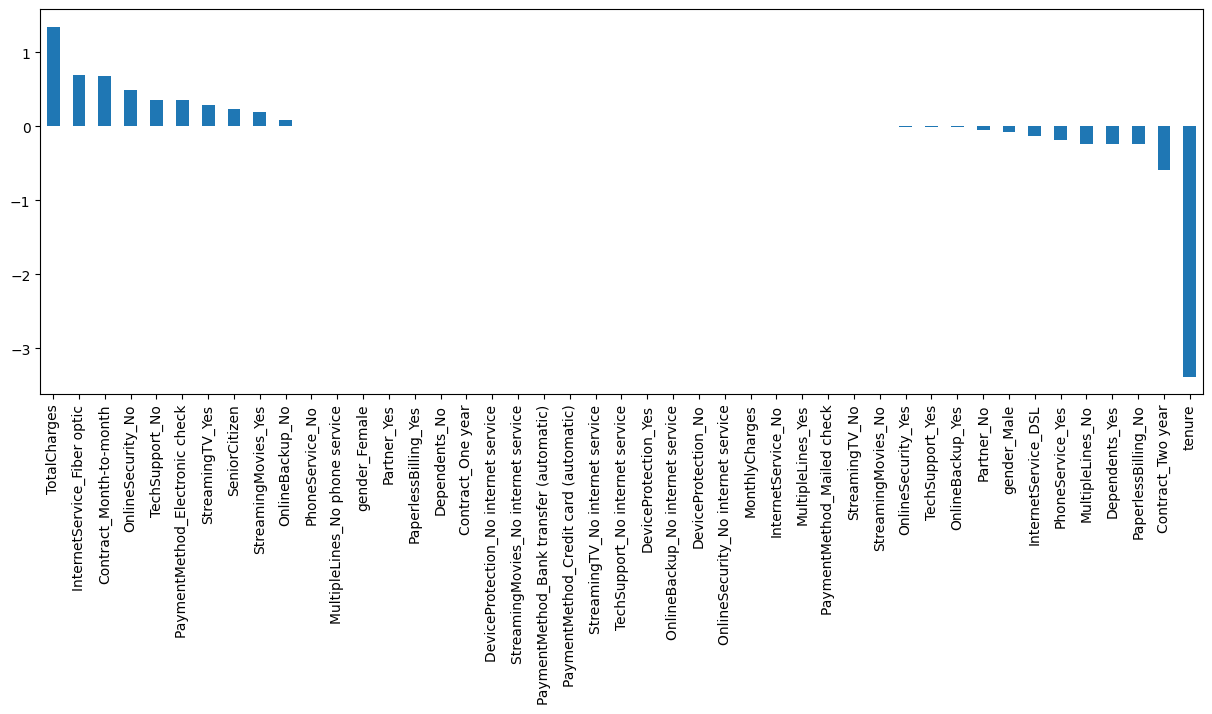

In [67]:
weights = pd.Series(lasso.coef_[0], index = X.columns.values)
weights = weights.sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar')
plt.show()

Se puede ver cuales fueron los features que fueron penalizados y convertidos a cero



In [68]:
weights[weights == 0]

Contract_One year                          0.0
DeviceProtection_No internet service       0.0
StreamingMovies_No internet service        0.0
PaymentMethod_Bank transfer (automatic)    0.0
PaymentMethod_Credit card (automatic)      0.0
StreamingTV_No internet service            0.0
TechSupport_No internet service            0.0
DeviceProtection_Yes                       0.0
OnlineBackup_No internet service           0.0
DeviceProtection_No                        0.0
OnlineSecurity_No internet service         0.0
MonthlyCharges                             0.0
InternetService_No                         0.0
MultipleLines_Yes                          0.0
PaymentMethod_Mailed check                 0.0
dtype: float64

## L2 Ridge 

Reduce la complejidad, reduciendo el peso que tienen las variables más irrelevantes halladas. Penaliza features poco relevantes, pero no los vuelve cero como l1.

In [71]:
ridge = LogisticRegression(max_iter=10000,penalty='l2',solver='saga',C=0.5)
ridge.fit(X_train,y_train)
ridge.score(X_test,y_test)

0.7919431279620853

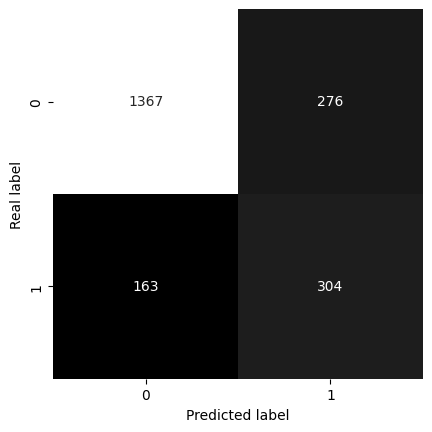

In [72]:
cm = confusion_matrix(ridge.predict(X_test),y_test)
sns.heatmap(
    cm,
    annot= True,
    cmap= 'gray',
    cbar= False,
    square=True,
    fmt='d'
)
plt.xlabel('Predicted label')
plt.ylabel('Real label')
plt.show()

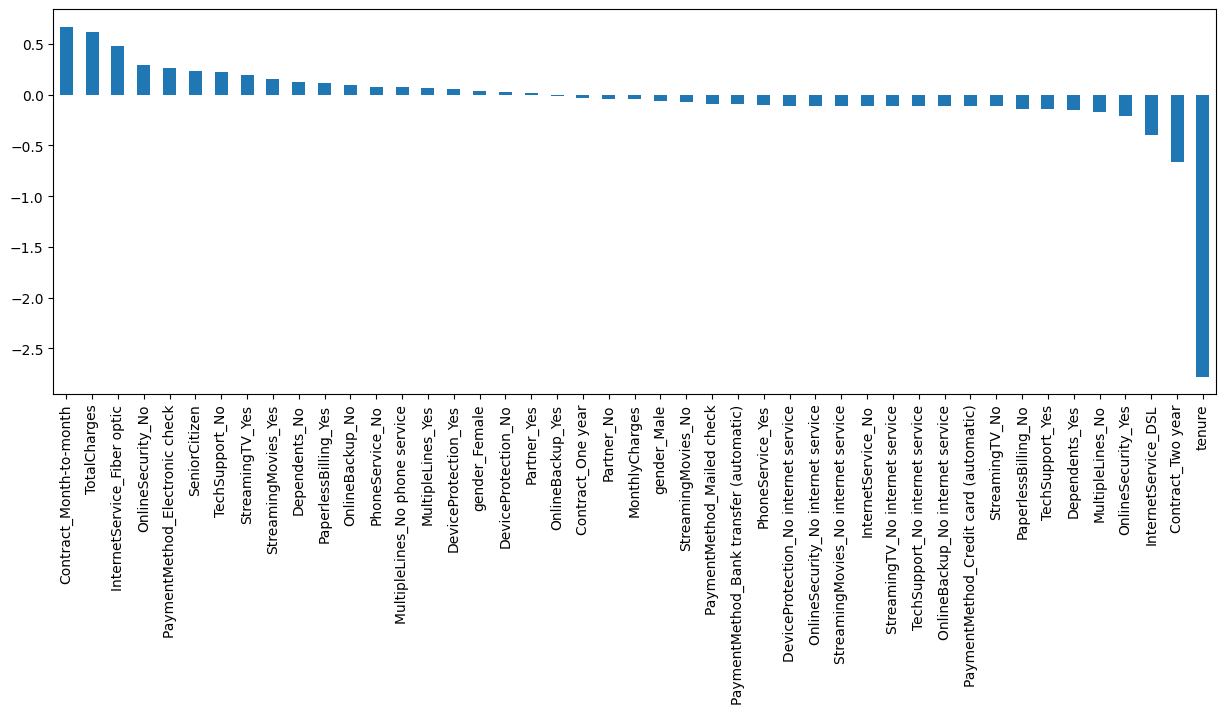

In [74]:
weights = pd.Series(ridge.coef_[0], index = X.columns.values)
weights = weights.sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar')
plt.show()

Se puede observar que a diferencia de l1, l2 no vuelve el peso de ciertos features en 0 

Nota: recordar que l2 es que tiene por defecto como penalización el modelo de LogisticRegression()

## ¿Cuándo usar l1 o l2?

- Dependiendo del caso se pueden utilizar uno o ambos
- Cuando se tienen pocos features relacionadas con el target, es útil lasso (l1)
- Cuando se tienen un numero considerable de variables relacionadas con el target, es útil Ridge(l2)